# Predicting Solar Flares with Machine Learning

### Yasser Abduallah, Jason T. L. Wang, Haimin Wang

## 1. Introduction

Solar flare prediction plays an important role in understanding and forecasting space weather. The main goal of the Helioseismic and Magnetic Imager (HMI), one of the instruments on NASA's Solar Dynamics Observatory, is to study the origin of solar variability and characterize the Sun's magnetic activity. HMI provides continuous full-disk observations of the solar vector magnetic field with high cadence data that lead to reliable predictive capability; yet, solar flare prediction effort utilizing these data is still limited.

In this notebook we provide an overview of the FlareML system to demonstrate how to predict solar flares using machine learning (ML) and SDO/HMI vector magnetic data products (SHARP parameters).

## 2. FlareML Workflow

### 2.1 Data Prepration & Loading

The data folder includes two sub-directories: train_data and test_data.
* The train_data includes a CSV training data file that is used to train the model. 
* The test_data includes a CSV test data file that is used to predict the included flares.

The files are loaded and used during the testing and training process.


### 2.2 ENS Model Training and Testing
You may train the model with your own data or train the model with the default data (see Sections 2.2.1 and 2.2.2).

#### 2.2.1 ENS Model Training with Default Data
Here, we show how to train the model with default data.
To train the model with your own data:
1. You should first upload your file to the data directory (in the left hand side file list).
2. Edit the args variable in the following code and update the path to the training file:<br> 'train_data_file':'data/train_data/flaringar_training_sample.csv' <br>and replace the value 'data/train_data/flaringar_training_sample.csv' with your new file name.

In [1]:
print('Loading the train_model function...')
from flareml_train import train_model
args = {'train_data_file':'data/train_data/flaringar_training_sample.csv',
        'algorithm': 'ENS',
       'modelid': 'custom_model_id'
      }
train_model(args)

Loading the train_model function...
Starting training with a model with id: custom_model_id training data file: data/train_data/flaringar_training_sample.csv
Loading data set...
Training is in progress, please wait until it is done...
Finished 1/3 training..
Finished 2/3 training..
Finished 3/3 training..

Finished training the ENS model, you may use the flareml_test.py program to make prediction.


#### 2.2.2 Predicting with Your ENS Model
To predict the testing data using the model you trained above, make sure the modelid value in the args variable in the following code is set exactly as the one used in the training, for example: 'custom_model_id'.

In [2]:
from flareml_test import test_model
args =  {'test_data_file': 'data/test_data/flaringar_simple_random_40.csv', 
         'algorithm': 'ENS', 
         'modelid': 'custom_model_id'}
custom_result = test_model(args)

Starting testing with a model with id: custom_model_id testing data file: data/test_data/flaringar_simple_random_40.csv
Loading data set...
Done loading data...
Formatting and mapping the flares classes..
Prediction is in progress, please wait until it is done...
Finished the prediction task..


#### 2.2.3 Plotting the Results
The prediction result can be plotted by passing the result variable to the function plot_custom_result as shown in the following example. The result shows the accuracy (TSS value) your model achieves for each flare class.

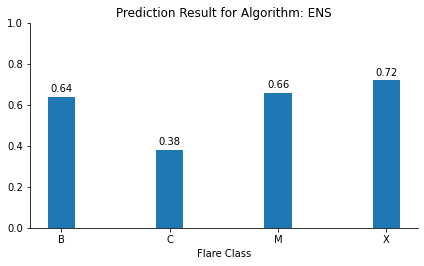

In [3]:
from flareml_utils import plot_custom_result
plot_custom_result(custom_result)

### 2.3 RF Model Training and Testing

#### 2.3.1 RF Model Training with Default Data

In [4]:
print('Loading the train_model function...')
from flareml_train import train_model
args = {'train_data_file':'data/train_data/flaringar_training_sample.csv',
        'algorithm': 'RF',
       'modelid': 'custom_model_id'
      }
train_model(args)

Loading the train_model function...
Starting training with a model with id: custom_model_id training data file: data/train_data/flaringar_training_sample.csv
Loading data set...
Training is in progress, please wait until it is done...

Finished training the RF model, you may use the flareml_test.py program to make prediction.


#### 2.3.2 Predicting with Your RF Model

In [5]:
from flareml_test import test_model
args =  {'test_data_file': 'data/test_data/flaringar_simple_random_40.csv', 
         'algorithm': 'RF', 
         'modelid': 'custom_model_id'}
custom_result = test_model(args)

Starting testing with a model with id: custom_model_id testing data file: data/test_data/flaringar_simple_random_40.csv
Loading data set...
Done loading data...
Formatting and mapping the flares classes..
Prediction is in progress, please wait until it is done...
Finished the prediction task..


#### 2.3.3 Plotting the Results

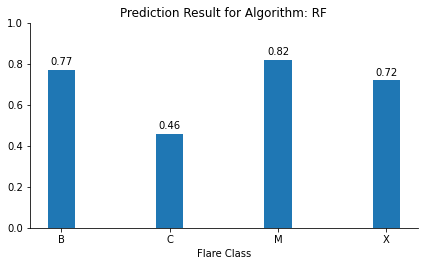

In [6]:
from flareml_utils import plot_custom_result
plot_custom_result(custom_result)

### 2.4 MLP Model Training and Testing
#### 2.4.1 MLP Model Training with Default Data

In [7]:
print('Loading the train_model function...')
from flareml_train import train_model
args = {'train_data_file':'data/train_data/flaringar_training_sample.csv',
        'algorithm': 'MLP',
       'modelid': 'custom_model_id'
      }
train_model(args)

Loading the train_model function...
Starting training with a model with id: custom_model_id training data file: data/train_data/flaringar_training_sample.csv
Loading data set...
Training is in progress, please wait until it is done...

Finished training the MLP model, you may use the flareml_test.py program to make prediction.


#### 2.4.2 Predicting with Your MLP Model

In [8]:
from flareml_test import test_model
args =  {'test_data_file': 'data/test_data/flaringar_simple_random_40.csv', 
         'algorithm': 'MLP', 
         'modelid': 'custom_model_id'}
custom_result = test_model(args)

Starting testing with a model with id: custom_model_id testing data file: data/test_data/flaringar_simple_random_40.csv
Loading data set...
Done loading data...
Formatting and mapping the flares classes..
Prediction is in progress, please wait until it is done...
Finished the prediction task..


#### 2.4.3 Plotting the Results

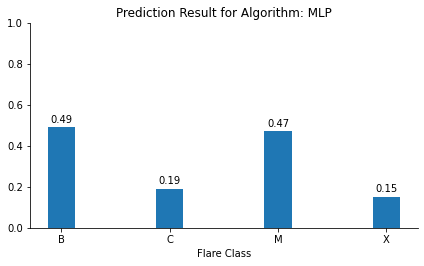

In [9]:
from flareml_utils import plot_custom_result
plot_custom_result(custom_result)

### 2.5 ELM Model Training and Testing
#### 2.5.1 ELM Model Training with Default Data

In [10]:
print('Loading the train_model function...')
from flareml_train import train_model
args = {'train_data_file':'data/train_data/flaringar_training_sample.csv',
        'algorithm': 'ELM',
       'modelid': 'custom_model_id'
      }
train_model(args)

Loading the train_model function...
Starting training with a model with id: custom_model_id training data file: data/train_data/flaringar_training_sample.csv
Loading data set...
Training is in progress, please wait until it is done...

Finished training the ELM model, you may use the flareml_test.py program to make prediction.


#### 2.5.2 Predicting with Your ELM Model

In [11]:
from flareml_test import test_model
args =  {'test_data_file': 'data/test_data/flaringar_simple_random_40.csv', 
         'algorithm': 'ELM', 
         'modelid': 'custom_model_id'}
custom_result = test_model(args)

Starting testing with a model with id: custom_model_id testing data file: data/test_data/flaringar_simple_random_40.csv
Loading data set...
Done loading data...
Formatting and mapping the flares classes..
Prediction is in progress, please wait until it is done...
Finished the prediction task..


#### 2.5.3 Plotting the Resluts

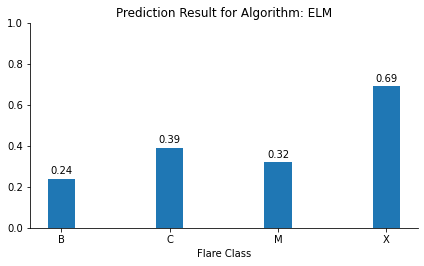

In [12]:
from flareml_utils import plot_custom_result
plot_custom_result(custom_result)

### 2.6 Predicting with Pretrained Models
There are default and pretrained models that can be used to predict without running your own trained model. The modelid  is set to default_model which uses all pretrained algorithms.

In [13]:
from flareml_test import test_model
args =  {'test_data_file': 'data/test_data/flaringar_simple_random_40.csv', 
         'modelid': 'default_model'}
result = test_model(args)

Starting testing with a model with id: default_model testing data file: data/test_data/flaringar_simple_random_40.csv
Loading data set...
Done loading data...
Formatting and mapping the flares classes..
Prediction is in progress, please wait until it is done...
Finished the prediction task..


#### 2.6.1 Plotting the Results
The prediction result can be plotted by passing the result variable to the function plot_result as shown in the following example.
The result shows the accuracy (TSS value) that each of the pretrained models achieves for each flare class.

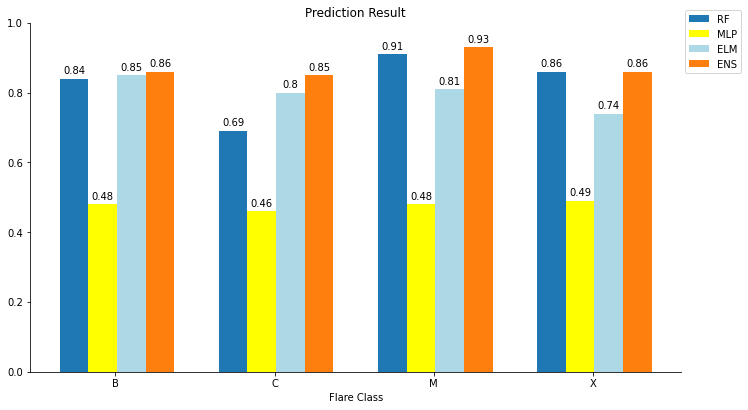

In [14]:
from flareml_utils import plot_result
plot_result(result)

## 3. Acknowledgment
We thank the team of SDO/HMI for producing vector magnetic data products. The flare catalogs were prepared by and made available through NOAA NCEI. This work was supported by U.S. NSF grants AGS-1927578 and AGS-1954737.

## 4. References
DeepSun: machine-learning-as-a-service for solar flare prediction

Yasser Abduallah, Jason T. L. Wang and Haimin Wang 

https://iopscience.iop.org/article/10.1088/1674-4527/21/7/160